In [1]:
#pip install --upgrade tensorflow

In [2]:
#pip install mobilenet-v3

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'processed_images/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'processed_images/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [4]:
# Mendapatkan daftar kelas beserta indeksnya
classes = train_generator.class_indices

# Membalikkan kunci dan nilai di dictionary
classes = {v: k for k, v in classes.items()}

# Menampilkan daftar kelas
print("Kelas yang ditemukan:")
for index, class_name in classes.items():
    print(f"Kelas {index}: {class_name}")


Kelas yang ditemukan:
Kelas 0: cataract
Kelas 1: normal


In [52]:
# Mendapatkan daftar kelas beserta indeksnya
classes = test_generator.class_indices

# Membalikkan kunci dan nilai di dictionary
classes = {v: k for k, v in classes.items()}

# Menampilkan daftar kelas
print("Kelas yang ditemukan:")
for index, class_name in classes.items():
    print(f"Kelas {index}: {class_name}")

Kelas yang ditemukan:
Kelas 0: cataract
Kelas 1: normal


# MobileNetV2



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2422081 (9.24 MB)
Trainable params: 1640

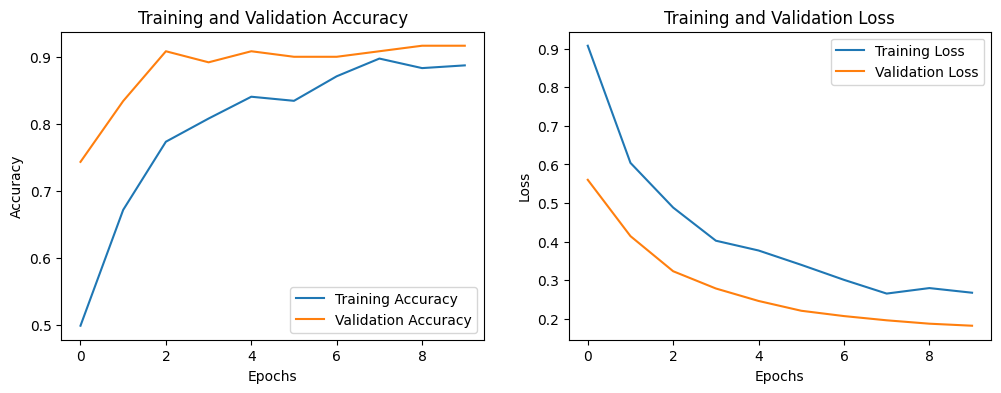

4/4 [==============================] - 6s 1s/step - loss: 0.1827 - accuracy: 0.9174
Test Accuracy: 91.74%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                

In [5]:
input_shape = (224, 224, 3)  


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

history = model.fit(
    train_generator,
    epochs=10, 
    validation_data=test_generator
)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

model.summary()

# Coba input User

In [53]:
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Membuat widget upload file
uploader = widgets.FileUpload(accept='image/*', multiple=False)

# Menampilkan widget
display(uploader)


FileUpload(value={}, accept='image/*', description='Upload')

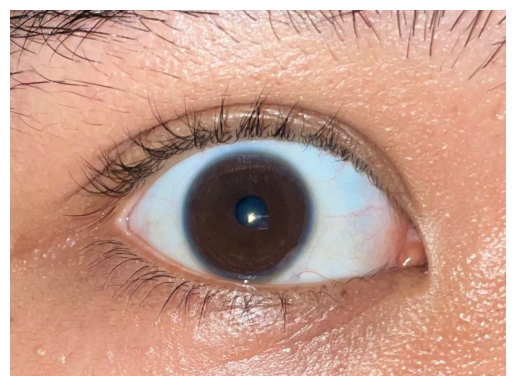

In [54]:
# Mengambil gambar dari widget upload
image = Image.open(io.BytesIO(uploader.data[0]))

# Menampilkan gambar
plt.imshow(image)
plt.axis('off')
plt.show()

# Mengonversi gambar menjadi array numpy
image_array = np.array(image.resize((224, 224))) / 255.0  # Mengubah ukuran dan normalisasi
image_array = np.expand_dims(image_array, axis=0)  # Menambahkan dimensi batch

In [55]:
# Melakukan prediksi
prediction = model.predict(image_array)

# Menampilkan hasil prediksi
if prediction[0][0] > 0.5:
    print("Gambar tersebut diprediksi masuk kelas Normal")
else:
    print("Gambar tersebut diprediksi masuk kelas Cataract")

1/1 [==============================] - 0s 344ms/step
Gambar tersebut diprediksi masuk kelas Normal


# Zoomed x1.2

FileUpload(value={}, accept='image/*', description='Upload')

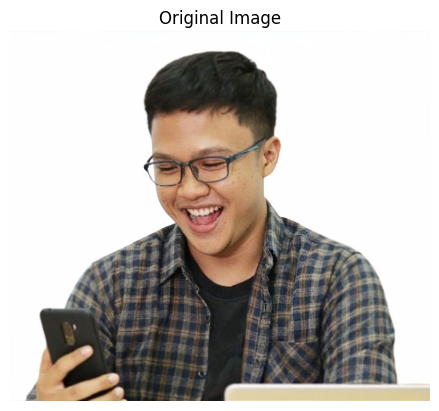

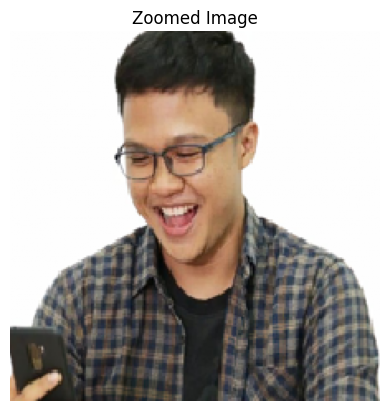

1/1 [==============================] - 0s 73ms/step
Gambar tersebut diprediksi masuk kelas Cataract


In [51]:
import io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
import tensorflow as tf
from tensorflow.keras.models import load_model  # Pastikan model Anda di-load
from IPython.display import display

# Asumsikan Anda sudah memiliki model yang dilatih sebelumnya
# model = load_model('path_to_your_model.h5')

# Buat fungsi untuk zoom gambar menggunakan TensorFlow
def zoom_image(image_array, zoom_factor):
    height, width, _ = image_array.shape
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)

    image = tf.image.resize(image_array, [new_height, new_width], method='nearest')
    crop_height = (new_height - height) // 2
    crop_width = (new_width - width) // 2
    cropped_image = image[crop_height:crop_height+height, crop_width:crop_width+width, :]
    
    return cropped_image.numpy()

# Buat widget untuk upload file
uploader = widgets.FileUpload(accept='image/*', multiple=False)

# Fungsi untuk menangani upload dan augmentasi gambar
def on_upload_change(change):
    if uploader.value:
        # Mengambil gambar dari widget upload
        uploaded_file = list(uploader.value.values())[0]
        image = Image.open(io.BytesIO(uploaded_file['content']))

        # Menampilkan gambar asli
        plt.imshow(image)
        plt.axis('off')
        plt.title("Original Image")
        plt.show()

        # Mengonversi gambar menjadi array numpy dan normalisasi
        image_array = np.array(image.resize((224, 224))) / 255.0  # Mengubah ukuran dan normalisasi

        # Zoom gambar
        zoom_factor = 1.2
        zoomed_image_array = zoom_image(image_array, zoom_factor)

        # Menampilkan gambar yang di-zoom
        plt.imshow(zoomed_image_array)
        plt.axis('off')
        plt.title("Zoomed Image")
        plt.show()

        # Menyiapkan gambar untuk prediksi model (menambahkan dimensi batch)
        image_array_for_model = np.expand_dims(zoomed_image_array, axis=0)

        # Melakukan prediksi
        prediction = model.predict(image_array_for_model)

        # Menampilkan hasil prediksi
        if prediction[0][0] > 0.5:
            print("Gambar tersebut diprediksi masuk kelas Normal")
        else:
            print("Gambar tersebut diprediksi masuk kelas Cataract")

# Tampilkan widget dan sambungkan ke fungsi
uploader.observe(on_upload_change, names='value')
display(uploader)